### USBL DATA PROCESSING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(25,25)})
sns.set_context("paper")

In [2]:
# This notebook reads csv info extracted from bagfile topics
# To obtain the csvs desired files use usbldata_csv_extractor.py script execute by doing: 
# python usbldata_csv_extractor.py path_to_the_bagfile

# Once the csvs are extracted save them following this structure:
# Desired path + turbot + 
                           #  modem_delayed":"modem_delayed.csv
                           #  modem_raw":"modem_raw.csv
                           #  USBLlon":"USBLlon.csv
                           #  nav_status_turbot":"nav_status_tu.csv
                
# Desired path + xiroi + nav_status_xi.csv           



#Path to folder containing the robot files that contain the csvs
#Change this path and reexecute the notebook to obtain the results from a different bagfile:

path ='/home/uib/bagfiles/postprocessing_cat/csvs/grassmap/15_09/'

In [3]:
robots=["turbot","xiroi"]

csv_files={"modem_delayed":"modem_delayed.csv",
           "modem_raw":"modem_raw.csv",
           "USBLlon":"USBLlon.csv",
           "nav_status_turbot":"nav_status_tu.csv",
           "xiroi_setpoints":"xiroi_setpoints.csv",
           "nav_status_xiroi":"nav_status_xi.csv"}

#Creates dataframe, sets timestamp as index and resamples to 0.1S (averages data for each 0.1s so that there is only 10 measures for second)
#Resampling allows joining diferent dataframes from different topics
def create_df(csv_file,robot):
    df=pd.read_csv(path+robot+"/"+csv_files[csv_file],header=0,index_col=0)
    original_df=df.copy(deep=False)
    
    df=df.rename(columns={df.columns[0]:"stamp"})
    df['stamp'] = pd.to_datetime(df["stamp"], unit='ns')
    df = df.set_index('stamp')
    df=df.resample('0.1S').mean()
    return original_df,df
    

In [4]:
#Create topic dataframes:

robot="turbot"
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT NAVIGATION")
turbot_nav_status_0,turbot_nav_status=create_df("nav_status_turbot",robot)
display(turbot_nav_status.head())
display(turbot_nav_status.tail())
display(turbot_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")
print("TURBOT USBLLONG")
USBLlon_0,USBLlon=create_df("USBLlon",robot)
display(USBLlon.head())
display(USBLlon.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM DELAYED")
modem_delayed_0,modem_delayed=create_df("modem_delayed",robot)
display(modem_delayed.head())
display(modem_delayed.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")
print("MODEM RAW")
modem_raw_0,modem_raw=create_df("modem_raw",robot)
display(modem_raw.head())
display(modem_raw.describe())
print("----------------------------------------------------------------------------------------------------------------------------------------------------------")

robot="xiroi"
print("XIROI NAVIGATION")
xiroi_nav_status_0,xiroi_nav_status=create_df("nav_status_xiroi",robot)
display(xiroi_nav_status.head())
display(xiroi_nav_status.tail())
display(xiroi_nav_status.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI SETPOINTS")
xiroi_setpoints_0,xiroi_setpoints=create_df("xiroi_setpoints",robot)
display(xiroi_setpoints.head())
display(xiroi_setpoints.describe())
print("---------------------------------------------------------------------------------------------------------------------------------------------------------")

print("XIROI USBLLONG")
USBLlon_0_x,USBLlon_x=create_df("USBLlon",robot)
#display(USBLlon_0_x.head())
#USBLlon_0_x.describe()

---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-15 16:18:40.600,5.435968,162.443833,-381.824611,9.941083,39.1546,2.9449,0.130811,-0.159049,-1.352485
2021-09-15 16:18:40.700,5.446050,162.443605,-381.819149,9.943219,39.1546,2.9449,0.126428,-0.175819,-1.360352
2021-09-15 16:18:40.800,5.457043,162.445404,-381.814390,9.967550,39.1546,2.9449,0.120144,-0.206355,-1.376522
2021-09-15 16:18:40.900,5.430431,162.446928,-381.810393,9.981794,39.1546,2.9449,0.116397,-0.225114,-1.387663
2021-09-15 16:18:41.000,5.420731,162.450001,-381.807848,10.022232,39.1546,2.9449,0.115627,-0.239642,-1.401205


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-15 16:52:52.000,7.624487,119.167940,-403.918004,3.577855,39.1546,2.9449,0.138692,-0.066716,2.113599
2021-09-15 16:52:52.100,7.625188,119.178640,-403.920927,3.574693,39.1546,2.9449,0.139933,-0.064098,2.112170
2021-09-15 16:52:52.200,7.626154,119.205581,-403.930530,3.577731,39.1546,2.9449,0.141866,-0.061755,2.110360
2021-09-15 16:52:52.300,7.626694,119.232729,-403.940923,3.577905,39.1546,2.9449,0.143214,-0.061155,2.108548
2021-09-15 16:52:52.400,7.626003,119.240514,-403.958045,3.576560,39.1546,2.9449,0.143311,-0.061499,2.107518


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,20519.000000,20519.000000,20519.000000,20519.000000,20519.0000,2.051900e+04,20519.000000,20519.000000,20519.000000
mean,8.939299,134.415003,-394.658637,4.023976,39.1546,2.944900e+00,0.059507,-0.065493,-0.491135
std,1.525450,14.552430,7.289375,1.789232,0.0000,8.882001e-16,0.061272,0.039171,1.784371
min,0.056073,107.586942,-409.543517,3.135075,39.1546,2.944900e+00,-0.234606,-0.324067,-3.139258
25%,8.589146,121.320253,-399.981219,3.510834,39.1546,2.944900e+00,0.024021,-0.080236,-2.023007
50%,8.983070,133.611859,-395.415488,3.606463,39.1546,2.944900e+00,0.054470,-0.059892,-1.441009
75%,9.747917,149.225035,-390.205819,3.721534,39.1546,2.944900e+00,0.087674,-0.043012,1.252769
max,11.593458,162.583860,-376.719359,15.861655,39.1546,2.944900e+00,0.607881,0.120142,3.139598


---------------------------------------------------------------------------------------------------------------------------------------------------------
TURBOT USBLLONG


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
stamp,,,,,,,,,
2021-09-15 16:19:08.100,-4.2909,25.257,1.8555,-18.102301,17.4459,-5.2647,0.0599,-0.0068,-0.8858
2021-09-15 16:19:08.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,usbllong_D,usbllong_E,usbllong_N,usbllong_X,usbllong_Y,usbllong_Z,usbllong_pitch,usbllong_roll,usbllong_yaw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,7.257746,0.682164,-19.344551,-14.874486,-12.361292,6.529329,0.053240,0.005491,-0.797085
std,5.239061,15.737532,8.917177,13.443254,12.408573,5.534755,0.033959,0.033598,0.308119
min,-18.678499,-41.508900,-57.704700,-59.810902,-42.813202,-16.936600,-0.044700,-0.122700,-1.912400
25%,5.593300,-11.559900,-24.896200,-23.993299,-21.143499,4.312200,0.031400,-0.016600,-0.933900
50%,6.821700,0.947300,-19.463301,-14.963600,-14.297600,6.429200,0.050800,0.003300,-0.796000
75%,7.946600,11.481800,-13.732900,-7.697600,-5.268500,7.900800,0.077000,0.025800,-0.663400
max,34.661301,34.602402,27.702700,31.537399,31.071899,35.232899,0.173300,0.147100,0.311400


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM DELAYED


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
stamp,,,,,,,
2021-09-15 16:19:08.100,-379.464406,154.969719,-3.4909,0.945388,0.0,0.0,-0.325946
2021-09-15 16:19:08.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_delayed_X,modem_delayed_Y,modem_delayed_Z,modem_delayed_ori_W,modem_delayed_ori_X,modem_delayed_ori_Y,modem_delayed_ori_Z
count,413.000000,413.000000,413.000000,413.000000,413.0,413.0,413.000000
mean,-393.604852,136.579828,8.057746,0.807913,0.0,0.0,-0.506659
std,9.344282,15.275339,5.239061,0.156656,0.0,0.0,0.257395
min,-412.566112,97.574802,-17.878499,0.072887,0.0,0.0,-0.997340
25%,-400.166221,124.250641,6.393300,0.735272,0.0,0.0,-0.677772
50%,-392.735857,138.873877,7.621700,0.826676,0.0,0.0,-0.562678
75%,-388.028707,149.435225,8.746600,0.916511,0.0,0.0,-0.400009
max,-353.334094,162.125337,35.461301,0.999999,0.0,0.0,0.182938


----------------------------------------------------------------------------------------------------------------------------------------------------------
MODEM RAW


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
stamp,,,,,,,
2021-09-15 16:19:08.100,-379.464406,154.969719,-3.4909,0.564153,-0.059809,0.077408,-0.819855
2021-09-15 16:19:08.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-15 16:19:08.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,-393.335727,135.713891,7.396080,0.612255,-0.013363,0.022409,-0.206745
std,8.804535,15.419235,3.478633,0.232075,0.033415,0.028954,0.727313
min,-411.512927,102.152906,-3.490900,0.101713,-0.090220,-0.078975,-0.991320
25%,-399.487362,123.791259,6.379775,0.465403,-0.036740,0.000620,-0.846712
50%,-392.543150,137.283042,7.654050,0.600664,-0.008037,0.027432,-0.697126
75%,-388.480953,149.233017,8.827600,0.798689,0.009493,0.042055,0.561017
max,-373.253721,162.125337,26.872100,0.999223,0.088878,0.081639,0.994338


----------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI NAVIGATION


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-15 16:18:29.200,0.0,129.914255,-376.024318,0.0,39.1546,2.9449,0.0,0.0,-0.594376
2021-09-15 16:18:29.300,0.0,129.912414,-376.033132,0.0,39.1546,2.9449,0.0,0.0,-0.588936
2021-09-15 16:18:29.400,0.0,129.904647,-376.027526,0.0,39.1546,2.9449,0.0,0.0,-0.603851
2021-09-15 16:18:29.500,0.0,129.904953,-376.030629,0.0,39.1546,2.9449,0.0,0.0,-0.619020
2021-09-15 16:18:29.600,0.0,129.901623,-376.030144,0.0,39.1546,2.9449,0.0,0.0,-0.632795


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
stamp,,,,,,,,,
2021-09-15 16:58:48.800,0.0,119.740937,-263.521562,0.0,39.1546,2.9449,0.0,0.0,0.727152
2021-09-15 16:58:48.900,0.0,119.734637,-263.522020,0.0,39.1546,2.9449,0.0,0.0,0.742911
2021-09-15 16:58:49.000,0.0,119.727693,-263.529077,0.0,39.1546,2.9449,0.0,0.0,0.735336
2021-09-15 16:58:49.100,0.0,119.721609,-263.531354,0.0,39.1546,2.9449,0.0,0.0,0.745404
2021-09-15 16:58:49.200,0.0,119.716764,-263.537496,0.0,39.1546,2.9449,0.0,0.0,0.735422


,nav_status_D,nav_status_E,nav_status_N,nav_status_alt,nav_status_origin_lat,nav_status_origin_lon,nav_status_pitch,nav_status_roll,nav_status_yaw
count,24201.0,24201.000000,24201.000000,24201.0,24201.0000,2.420100e+04,24201.0,24201.0,24201.000000
mean,0.0,128.805809,-363.084838,0.0,39.1546,2.944900e+00,0.0,0.0,-0.910861
std,0.0,3.698587,30.334590,0.0,0.0000,4.440984e-16,0.0,0.0,0.855219
min,0.0,114.113469,-376.915588,0.0,39.1546,2.944900e+00,0.0,0.0,-3.123559
25%,0.0,129.756844,-375.945164,0.0,39.1546,2.944900e+00,0.0,0.0,-1.419519
50%,0.0,130.280848,-375.622772,0.0,39.1546,2.944900e+00,0.0,0.0,-1.071154
75%,0.0,130.436085,-375.019208,0.0,39.1546,2.944900e+00,0.0,0.0,-0.458724
max,0.0,130.954736,-263.511131,0.0,39.1546,2.944900e+00,0.0,0.0,3.134714


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI SETPOINTS


,setpoint_0,setpoint_1
stamp,,
2021-09-15 16:18:29.300,0.031190,-0.307429
2021-09-15 16:18:29.400,-0.160290,-0.236962
2021-09-15 16:18:29.500,-0.169623,-0.240147
2021-09-15 16:18:29.600,-0.301303,0.148067
2021-09-15 16:18:29.700,-0.300023,0.110684


,setpoint_0,setpoint_1
count,24200.000000,24200.000000
mean,0.058538,0.051259
std,0.245946,0.249370
min,-0.779063,-0.803115
25%,-0.141994,-0.159001
50%,0.135086,0.117716
75%,0.191251,0.191417
max,0.911180,0.911180


---------------------------------------------------------------------------------------------------------------------------------------------------------
XIROI USBLLONG


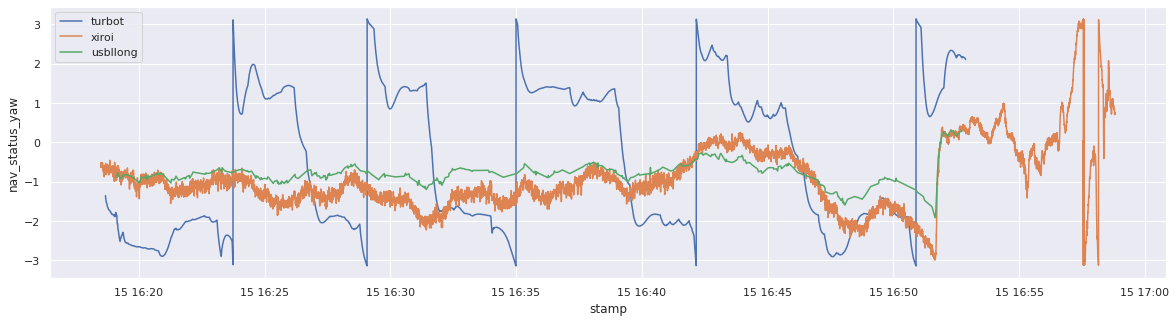

In [5]:
# Plot yaw
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=turbot_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=xiroi_nav_status,x="stamp", y="nav_status_yaw",ax=ax)
sns.lineplot(data=USBLlon.dropna(),x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()
# The dataset from the xiroi navigation is shorter than the rest
# There is an offset rotation between the xiroi mag and the usbl mag. Let me unify datasets

In [6]:
#Create a unified dataframe:
nav = turbot_nav_status.join(xiroi_nav_status, lsuffix='_turbot', rsuffix='_xiroi').dropna()
nav=nav.join(USBLlon).dropna()
#nav=nav.join(modem_delayed).dropna()
nav=nav.join(modem_raw).dropna()
nav.head()

nav=nav.join(xiroi_setpoints).dropna()
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,usbllong_yaw,modem_raw_X,modem_raw_Y,modem_raw_Z,modem_raw_ori_W,modem_raw_ori_X,modem_raw_ori_Y,modem_raw_ori_Z,setpoint_0,setpoint_1
stamp,,,,,,,,,,,,,,,,,,,,,
2021-09-15 16:19:08.100,0.227138,156.231473,-379.423758,15.194700,39.1546,2.9449,-0.010808,-0.194563,-1.939680,0.0,...,-0.8858,-379.464406,154.969719,-3.4909,0.564153,-0.059809,0.077408,-0.819855,-0.134095,0.306220
2021-09-15 16:19:24.100,1.740040,151.853297,-378.153027,13.475427,39.1546,2.9449,-0.026680,-0.168428,-2.395719,0.0,...,-0.8475,-377.660862,150.317865,-1.4235,0.362303,-0.043845,0.075037,-0.928000,0.178993,0.211974
2021-09-15 16:19:25.500,1.871660,151.366678,-378.444191,13.228348,39.1546,2.9449,-0.014043,-0.100860,-2.457178,0.0,...,-0.8231,-378.243078,149.630954,-2.4523,0.335526,-0.023058,0.044508,-0.940696,-0.285627,0.184390
2021-09-15 16:20:01.800,5.945605,150.063849,-378.810607,9.019713,39.1546,2.9449,0.038081,-0.058112,-2.652498,0.0,...,-1.0257,-378.097511,149.442919,3.4119,0.242512,0.011436,0.032783,-0.969527,-0.373410,-0.030679
2021-09-15 16:22:00.100,10.014012,135.033141,-388.194004,3.313465,39.1546,2.9449,0.059944,-0.046481,-1.998246,0.0,...,-0.8369,-388.344511,134.144491,9.7832,0.541121,0.012530,0.035754,-0.840091,0.185743,-0.188284


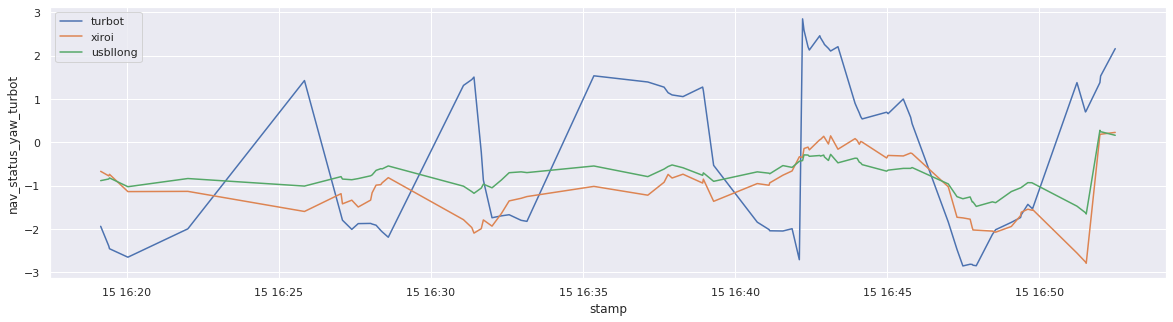

In [7]:
# Plot yaw again
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
plt.legend(["turbot","xiroi","usbllong"])
plt.show()

In [25]:
# Now get the mean yaw difference
yaw_diff = nav.nav_status_yaw_xiroi.mean() - nav.usbllong_yaw.mean()
yaw_diff_2 = (nav.nav_status_yaw_xiroi - nav.usbllong_yaw).mean()
print(yaw_diff*180/np.pi)
print(yaw_diff_2*180/np.pi)

# We will assume that ther is a 90º rotation
nav['usbllong_yaw_corrected'] = nav['usbllong_yaw'] + yaw_diff

-14.557678576168511
-14.557678576168518


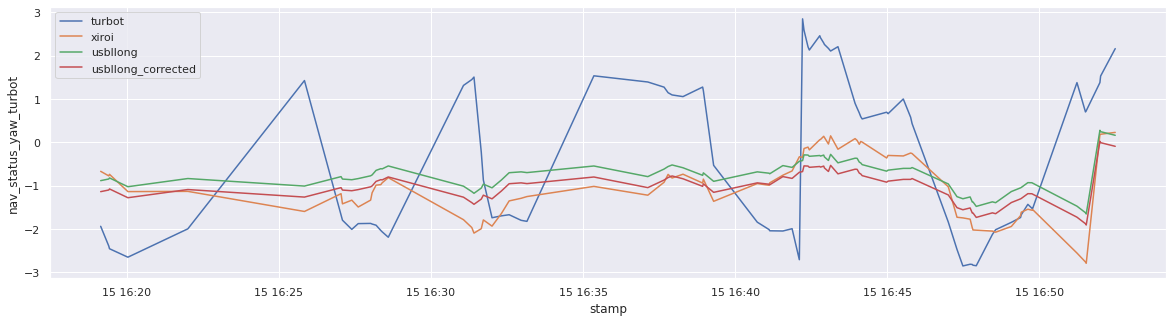

In [9]:
# Plot yaw again!!
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_turbot",ax=ax)
sns.lineplot(data=nav,x="stamp", y="nav_status_yaw_xiroi",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw",ax=ax)
sns.lineplot(data=nav,x="stamp", y="usbllong_yaw_corrected",ax=ax)
plt.legend(["turbot","xiroi","usbllong", "usbllong_corrected"])
plt.show()
# The differences are due to the use of different calibrations

In [10]:
# Lets transform the USBL measurements, use the following transformation matrix for the rotations
# x' = xcos(yaw) - ysin(yaw)
# y' = xsin(yaw) + cos(yaw)

# 1 - Xiroi + usbllong (mag xiroi)
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["nav_status_yaw_xiroi"])-nav['usbllong_Y']*np.sin(nav["nav_status_yaw_xiroi"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["nav_status_yaw_xiroi"])+nav['usbllong_Y']*np.cos(nav["nav_status_yaw_xiroi"])
nav['p1_N'] = nav['nav_status_N_xiroi'] + usbllong_X_transf
nav['p1_E'] = nav['nav_status_E_xiroi'] + usbllong_Y_transf

# 2 - Xiroi + usbllong (mag usbl) 
usbllong_X_transf = nav['usbllong_X']*np.cos(nav["usbllong_yaw_corrected"])-nav['usbllong_Y']*np.sin(nav["usbllong_yaw_corrected"])
usbllong_Y_transf = nav['usbllong_X']*np.sin(nav["usbllong_yaw_corrected"])+nav['usbllong_Y']*np.cos(nav["usbllong_yaw_corrected"])
nav['p2_N'] = nav['nav_status_N_xiroi']+usbllong_X_transf
nav['p2_E'] = nav['nav_status_E_xiroi']+usbllong_Y_transf


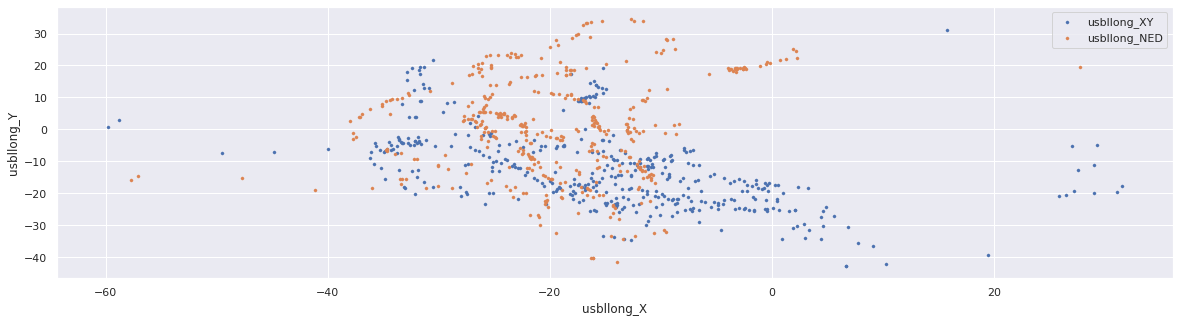

In [11]:
# Plot USBLlon XY and USBLlon NED(this one should be rotated in world directions according to USBL IMU) 
# Weird similarity?

fig, ax = plt.subplots()

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["usbllong_XY","usbllong_NED"])
#plt.axis('equal')
plt.show()

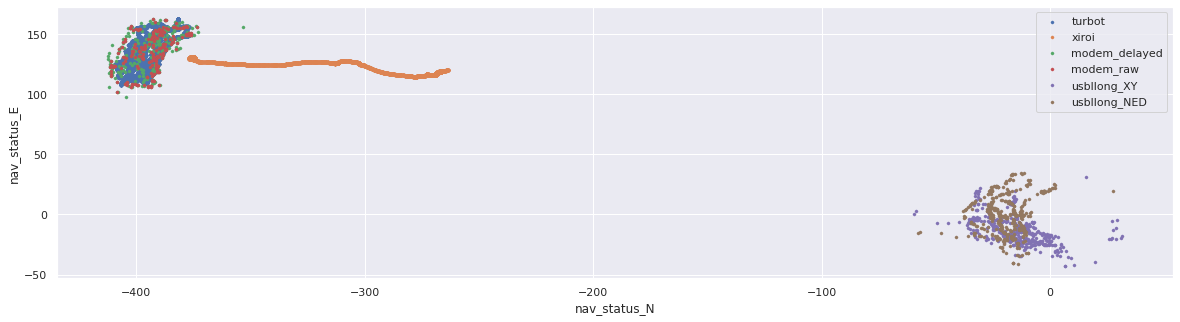

In [12]:
# Plot localization + USBllon +modem
fig, ax = plt.subplots()
sns.scatterplot(data=turbot_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=xiroi_nav_status,x="nav_status_N", y="nav_status_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=modem_delayed,x="modem_delayed_X", y="modem_delayed_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=modem_raw,x="modem_raw_X", y="modem_raw_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)

sns.scatterplot(data=USBLlon,x="usbllong_X", y="usbllong_Y", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=USBLlon,x="usbllong_N", y="usbllong_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","xiroi","modem_delayed","modem_raw","usbllong_XY","usbllong_NED"])

# plt.axis('equal')
plt.show()

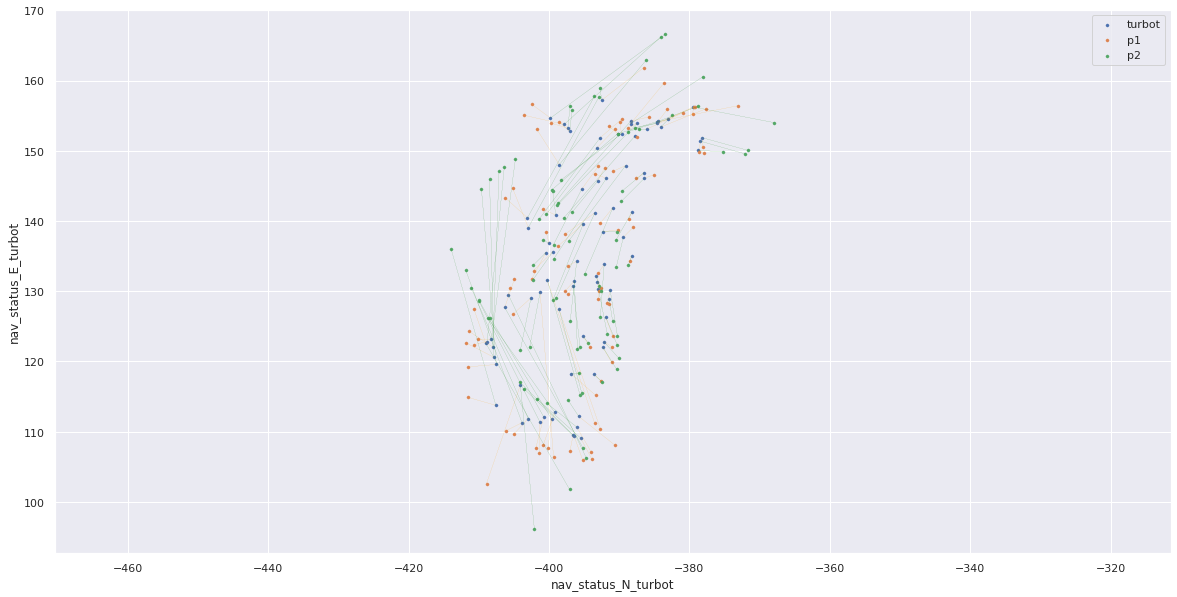

In [13]:
# Plot 
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p1_N", y="p1_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue=None, style=None, edgecolor=None, s=10, ax=ax)
plt.legend(["turbot","p1","p2","modem_raw"])
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p1_N], [row.nav_status_E_turbot, row.p1_E], linewidth=0.1, c='orange')
for index, row in nav.iterrows():
    plt.plot([row.nav_status_N_turbot, row.p2_N], [row.nav_status_E_turbot, row.p2_E], linewidth=0.1, c='green')
plt.axis('equal')
plt.show()

In [14]:
# Compute error
N_error_p1 = np.abs(nav['nav_status_N_turbot']-nav['p1_N'])
E_error_p1 = np.abs(nav['nav_status_E_turbot']-nav['p1_E'])
nav['error_p1'] = np.sqrt(np.power(N_error_p1,2)+np.power(E_error_p1,2))

N_error_p2 = np.abs(nav['nav_status_N_turbot']-nav['p2_N'])
E_error_p2 = np.abs(nav['nav_status_E_turbot']-nav['p2_E'])
nav['error_p2'] = np.sqrt(np.power(N_error_p2,2)+np.power(E_error_p2,2))

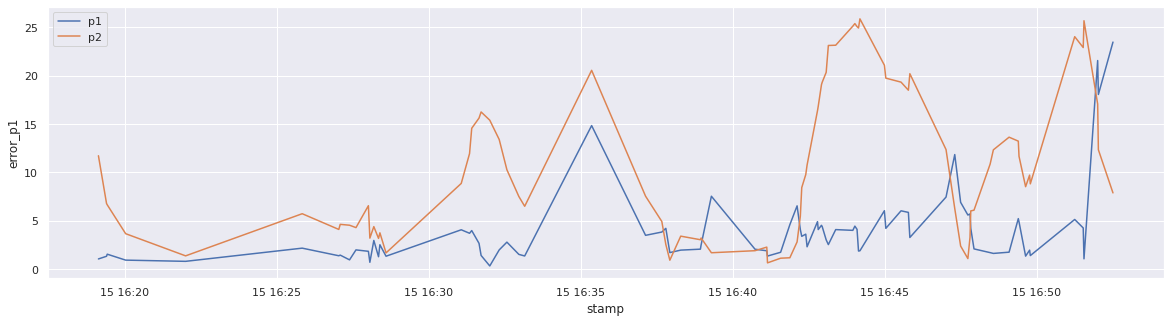

In [15]:
# Plot error 
sns.set(rc={'figure.figsize':(20,5)})
fig, ax = plt.subplots()
sns.lineplot(data=nav,x="stamp", y="error_p1",ax=ax)
sns.lineplot(data=nav,x="stamp", y="error_p2",ax=ax)
plt.legend(["p1","p2"])
plt.show()

In [16]:
# Compute acoustic distance 
E_dist = np.abs(nav['nav_status_E_turbot']-nav['nav_status_E_xiroi'])
N_dist = np.abs(nav['nav_status_N_turbot']-nav['nav_status_N_xiroi'])
D_dist = nav['nav_status_D_turbot']-nav['nav_status_D_xiroi']

nav['dist_2D']=np.sqrt(np.power(E_dist,2)+np.power(N_dist,2))
nav['dist_3D']=np.sqrt(np.power(nav['dist_2D'],2)+np.power(D_dist,2))

In [17]:
nav.head()

,nav_status_D_turbot,nav_status_E_turbot,nav_status_N_turbot,nav_status_alt_turbot,nav_status_origin_lat_turbot,nav_status_origin_lon_turbot,nav_status_pitch_turbot,nav_status_roll_turbot,nav_status_yaw_turbot,nav_status_D_xiroi,...,setpoint_1,usbllong_yaw_corrected,p1_N,p1_E,p2_N,p2_E,error_p1,error_p2,dist_2D,dist_3D
stamp,,,,,,,,,,,,,,,,,,,,,
2021-09-15 16:19:08.100,0.227138,156.231473,-379.423758,15.194700,39.1546,2.9449,-0.010808,-0.194563,-1.939680,0.0,...,0.306220,-1.139879,-379.545333,155.185251,-367.917541,154.001863,1.053262,11.720248,26.162761,26.163747
2021-09-15 16:19:24.100,1.740040,151.853297,-378.153027,13.475427,39.1546,2.9449,-0.026680,-0.168428,-2.395719,0.0,...,0.211974,-1.101579,-378.128188,150.523293,-371.611714,150.039628,1.330236,6.788091,21.482202,21.552558
2021-09-15 16:19:25.500,1.871660,151.366678,-378.444191,13.228348,39.1546,2.9449,-0.014043,-0.100860,-2.457178,0.0,...,0.184390,-1.077179,-378.624508,149.831656,-372.049893,149.546327,1.545576,6.648362,21.103547,21.186382
2021-09-15 16:20:01.800,5.945605,150.063849,-378.810607,9.019713,39.1546,2.9449,0.038081,-0.058112,-2.652498,0.0,...,-0.030679,-1.279779,-377.940696,149.731280,-375.152067,149.850983,0.931315,3.664727,20.230223,21.085828
2021-09-15 16:22:00.100,10.014012,135.033141,-388.194004,3.313465,39.1546,2.9449,0.059944,-0.046481,-1.998246,0.0,...,-0.188284,-1.090979,-388.521428,134.296908,-388.680789,133.749515,0.805758,1.372827,13.423717,16.747436


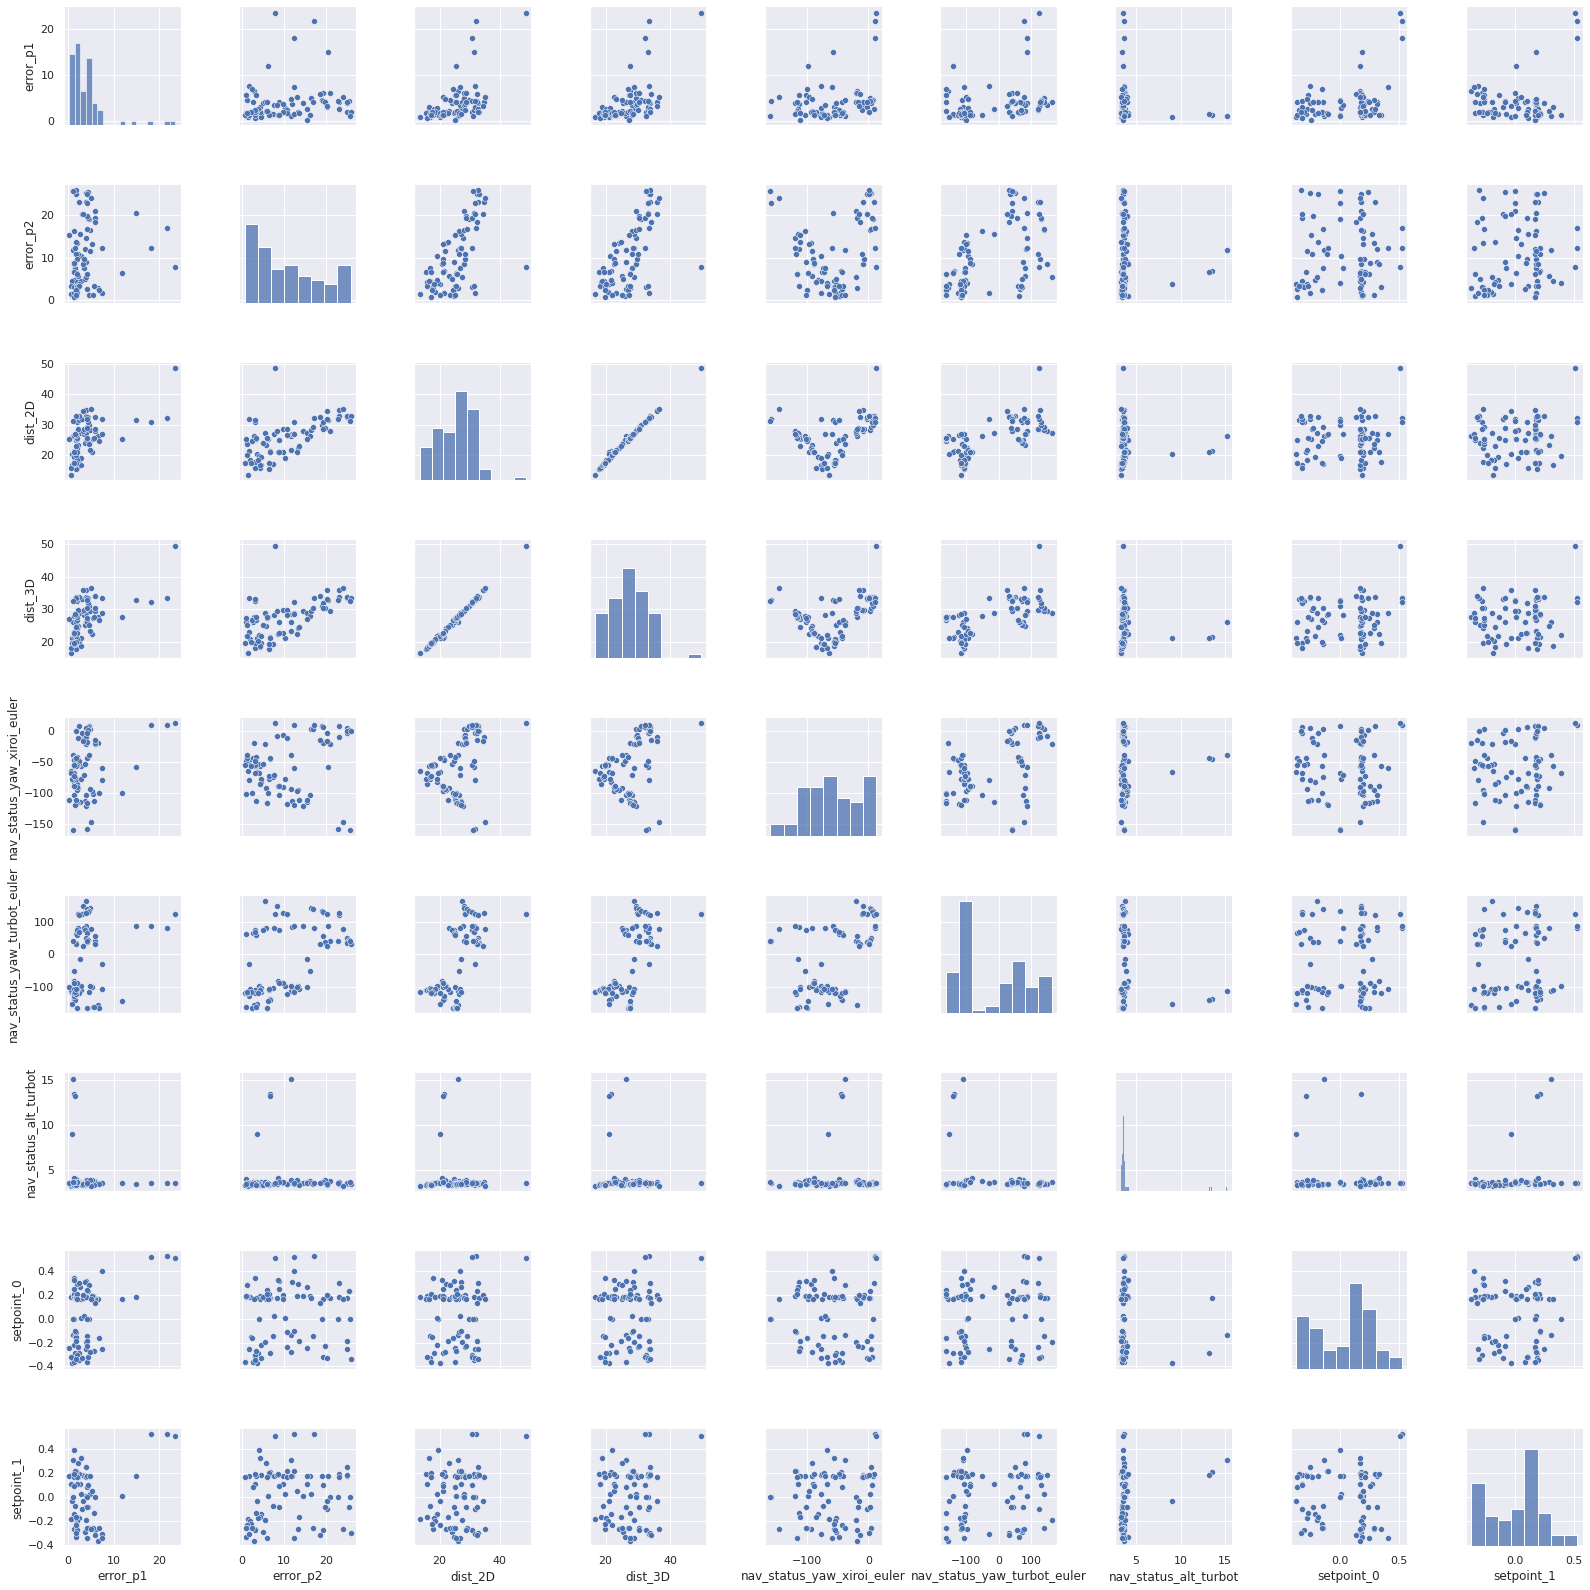

In [18]:
# Error correlation with distance and orientation
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
nav['nav_status_yaw_turbot_euler'] = nav['nav_status_yaw_turbot'] *180/np.pi 
nav_corr=nav[['error_p1','error_p2','dist_2D','dist_3D','nav_status_yaw_xiroi_euler','nav_status_yaw_turbot_euler','nav_status_alt_turbot',"setpoint_0","setpoint_1"]]
sns.pairplot(nav_corr)

,error_p1,error_p2,dist_3D,nav_status_yaw_xiroi
count,83.000000,83.000000,83.000000,83.000000
mean,3.957005,10.702407,27.240194,-1.009726
std,4.086126,7.704675,5.694022,0.773495
min,0.329936,0.648463,16.747436,-2.792662
25%,1.707627,3.928834,22.552581,-1.605567
50%,2.790746,8.815034,27.606445,-0.989726
75%,4.425427,16.604789,31.526797,-0.309948
max,23.468083,25.868685,49.497065,0.228075


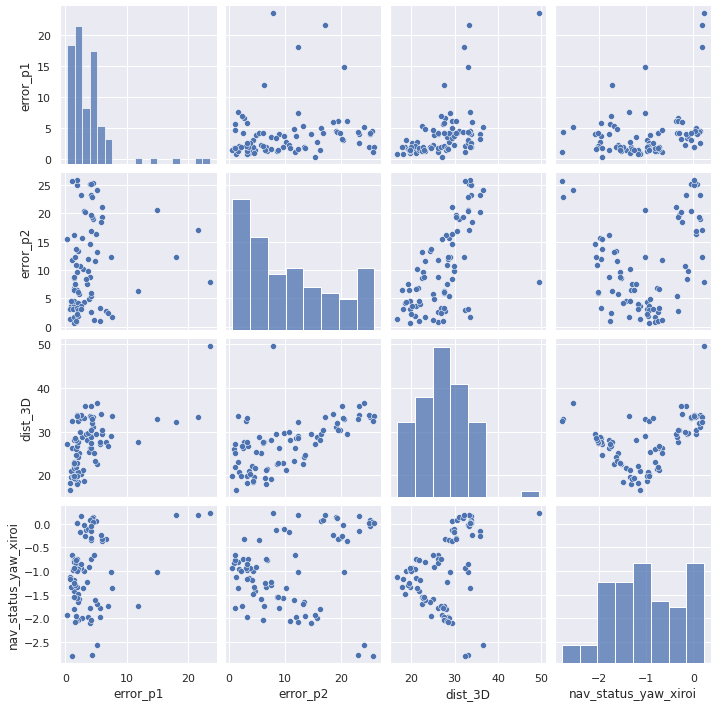

In [19]:
# Error correlation with distance and orientation
nav_corr=nav[['error_p1','error_p2','dist_3D','nav_status_yaw_xiroi']]
sns.pairplot(nav_corr)
# There is a clear correlation between the usbl error and the xiroi orientation, not that evident but important with the distance
display(nav_corr.describe())

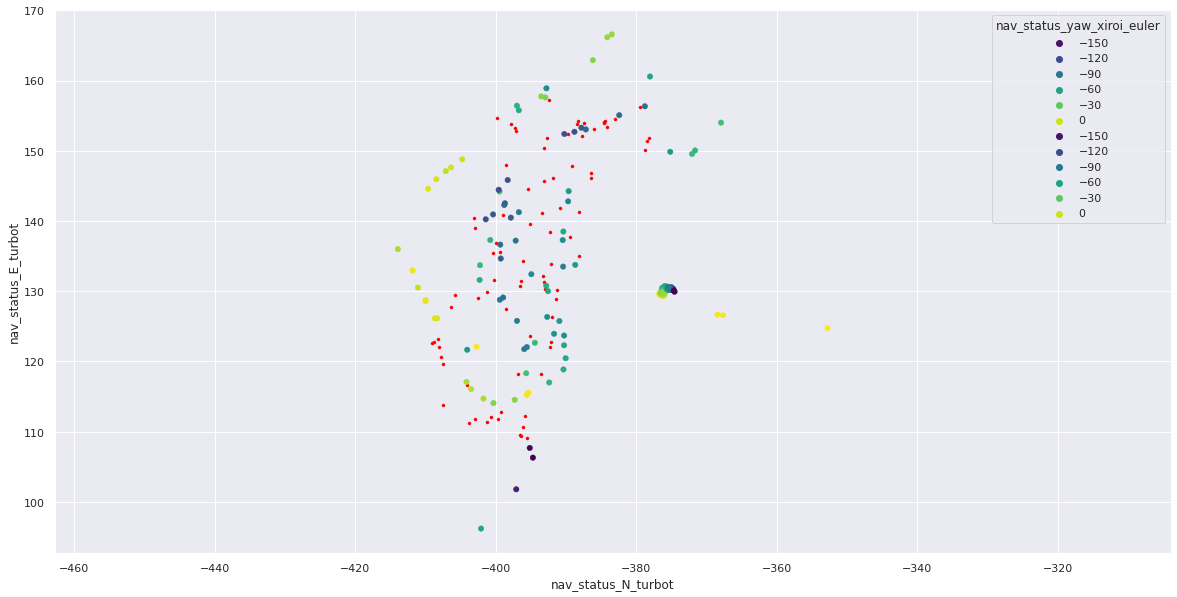

In [20]:
# Lets plot again the localization results, this time color represents the xiroi orientation
sns.set(rc={'figure.figsize':(20,10)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='nav_status_yaw_xiroi_euler', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

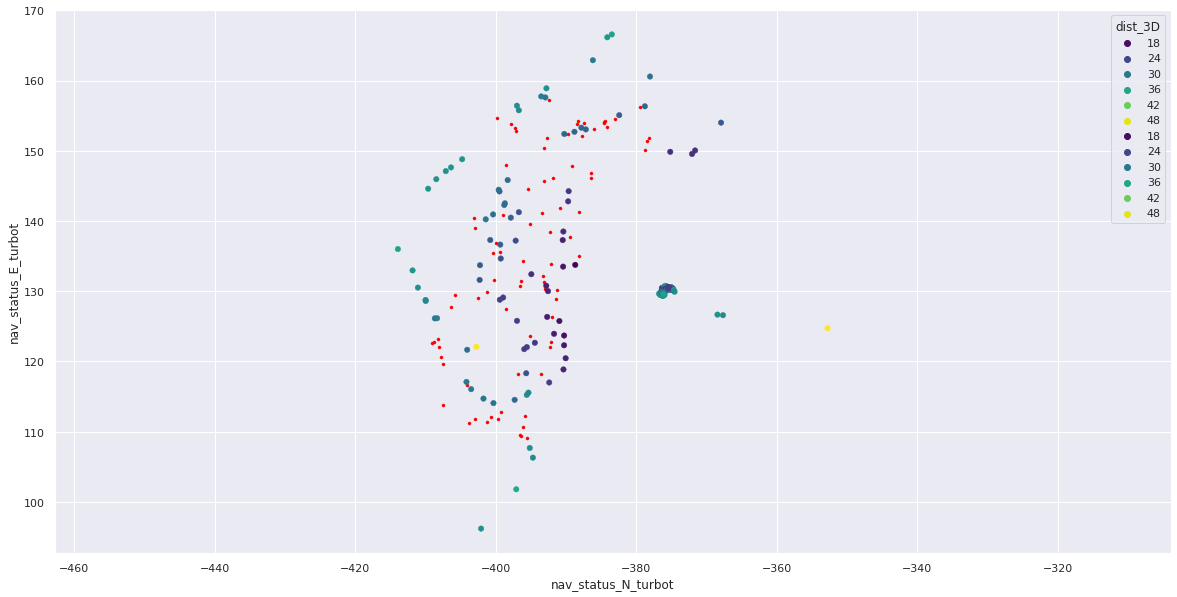

In [21]:
# Lets plot again the localization results, this time color represents the distance
sns.set(rc={'figure.figsize':(20,10)})
nav['nav_status_yaw_xiroi_euler'] = nav['nav_status_yaw_xiroi'] *180/np.pi 
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="nav_status_N_turbot", y="nav_status_E_turbot", hue=None, style=None, edgecolor=None, s=10, ax=ax, color='red')
sns.scatterplot(data=nav,x="p2_N", y="p2_E", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
sns.scatterplot(data=nav,x="nav_status_N_xiroi", y="nav_status_E_xiroi", hue='dist_3D', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.axis('equal')
plt.show()

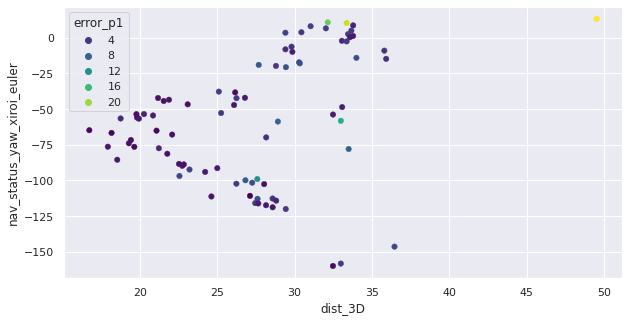

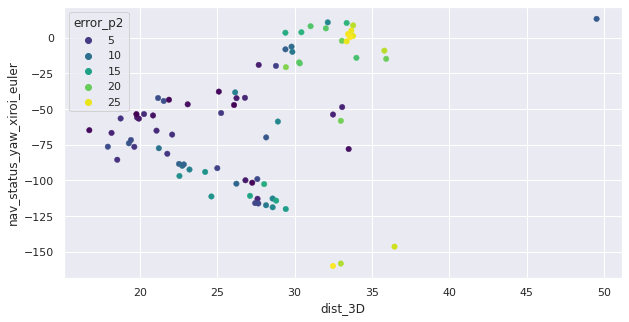

In [22]:
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p1', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()
sns.set(rc={'figure.figsize':(10,5)})
fig, ax = plt.subplots()
sns.scatterplot(data=nav,x="dist_3D", y="nav_status_yaw_xiroi_euler", hue='error_p2', style=None, edgecolor=None, s=30, ax=ax, palette='viridis')
plt.show()

In [23]:
# Check correlation with setpoints or speeds
# There is a clear correlation with the orientation. However it is not conclusive, we should check the correlation with setpoints or speeds. And check that in other datasets we find the same behavior.
# In case that we confirm this correlation find the cause
# Extract the RSSI values too